In [40]:
DC_path = "C:\\Users\\John\\Documents\\notGitHub\\addresses\\us\\dc\\statewide.csv"
DC_list = "C:\\Users\\John\\Documents\\notGitHub\\DC_addresses.csv"
DC_shape = "C:\\Users\\John\\Documents\\notGitHub\\address_shape\\Address_Points.xml"
DC_web = "C:\\Users\\John\\Documents\\notGitHub\\DC_web.json"


In [16]:
import pandas as pd
import geopandas as gpd
DC = pd.read_csv(DC_list)

In [17]:
DC.columns

Index(['STATE', 'COUNTY', 'TRACT', 'BLOCK', 'GEOID', 'ORIGINAL_COUNT_OF_HUs',
       'CURRENT_COUNT_OF_HUs', 'LOCAL_COUNT_OF_HUs', 'DIFFERENCE_IN_HUs',
       'ORIGINAL_COUNT_OF_GQs', 'CURRENT_COUNT_OF_GQs', 'LOCAL_COUNT_OF_GQs',
       'DIFFERENCE_IN_GQs'],
      dtype='object')

In [18]:
DC.head()

,STATE,COUNTY,TRACT,BLOCK,GEOID,ORIGINAL_COUNT_OF_HUs,CURRENT_COUNT_OF_HUs,LOCAL_COUNT_OF_HUs,DIFFERENCE_IN_HUs,ORIGINAL_COUNT_OF_GQs,CURRENT_COUNT_OF_GQs,LOCAL_COUNT_OF_GQs,DIFFERENCE_IN_GQs
0,11.0,1.0,1.0,1000.0,110010001001000,212,212,0,212,0,0,0,0
1,11.0,1.0,1.0,1001.0,110010001001001,15,15,0,15,0,0,0,0
2,11.0,1.0,1.0,1002.0,110010001001002,87,87,0,87,0,0,0,0
3,11.0,1.0,1.0,1003.0,110010001001003,83,83,0,83,0,0,0,0
4,11.0,1.0,1.0,1004.0,110010001001004,56,56,0,56,0,0,0,0


In [27]:
df_DC = gpd.GeoDataFrame.from_file(DC_shape)

In [28]:
df_DC.columns

Index(['OBJECTID_1', 'SITE_ADDRE', 'ADDRESS_ID', 'STATUS', 'SSL', 'TYPE_',
       'ENTRANCETY', 'ADDRNUM', 'ADDRNUMSUF', 'STNAME', 'STREET_TYP',
       'QUADRANT', 'CITY', 'STATE', 'FULLADDRES', 'SQUARE', 'SUFFIX', 'LOT',
       'NATIONALGR', 'ASSESSMENT', 'ASSESSME_1', 'CFSA_NAME', 'HOTSPOT',
       'CLUSTER_', 'POLDIST', 'ROC', 'PSA', 'SMD', 'CENSUS_TRA', 'VOTE_PRCNC',
       'WARD', 'ZIPCODE', 'ANC', 'NEWCOMMSEL', 'NEWCOMMCAN', 'CENSUS_BLO',
       'CENSUS_B_1', 'FOCUS_IMPR', 'SE_ANNO_CA', 'LATITUDE', 'LONGITUDE',
       'ACTIVE_RES', 'RES_TYPE', 'ACTIVE_R_1', 'WARD_2002', 'WARD_2012',
       'ANC_2002', 'ANC_2012', 'SMD_2002', 'SMD_2012', 'geometry'],
      dtype='object')

In [33]:
df_DC.ACTIVE_R_1.describe()

count    147113.000000
mean          2.328985
std          13.887376
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1181.000000
Name: ACTIVE_R_1, dtype: float64

In [35]:
df_DC.ACTIVE_RES.describe()

count    147113.000000
mean          1.576462
std          13.975987
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1181.000000
Name: ACTIVE_RES, dtype: float64

In [39]:
df_DC.RES_TYPE.value_counts()

RESIDENTIAL        131020
NON RESIDENTIAL     15668
MIXED USE             426
Name: RES_TYPE, dtype: int64

In [36]:
df_DC[df_DC.ACTIVE_RES==0].shape

(126230, 51)

In [37]:
df_DC[df_DC.ACTIVE_R_1==0].shape

(18766, 51)

In [41]:
DC_j = gpd.read_file(DC_web)

In [44]:
DC_j.head(1)

# occupancy count is the number of units at the address
# active_res_unit_count is the number of occupied units at the address

,ENTRANCETYPE,FULLADDRESS,LATITUDE,LONGITUDE,ACTIVE_RES_UNIT_COUNT,ANC_2012,ACTIVE_RES_OCCUPANCY_COUNT,SMD,PSA,CENSUS_BLOCK,RES_TYPE,geometry
0,OFFICIAL,1627 VARNUM PLACE NE,38.943237,-76.982426,0.0,ANC 5B,1.0,SMD 5B01,Police Service Area 405,009503 2005,RESIDENTIAL,POINT (-76.98242830595981 38.94324443041245)


In [47]:
DC_j.columns

Index(['ENTRANCETYPE', 'FULLADDRESS', 'LATITUDE', 'LONGITUDE',
       'ACTIVE_RES_UNIT_COUNT', 'ANC_2012', 'ACTIVE_RES_OCCUPANCY_COUNT',
       'SMD', 'PSA', 'CENSUS_BLOCK', 'RES_TYPE', 'geometry'],
      dtype='object')

c:\programdata\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


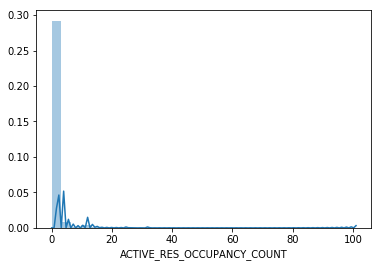

In [49]:
import matplotlib
import seaborn as sns

sns.distplot(DC_j.ACTIVE_RES_OCCUPANCY_COUNT)

c:\programdata\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


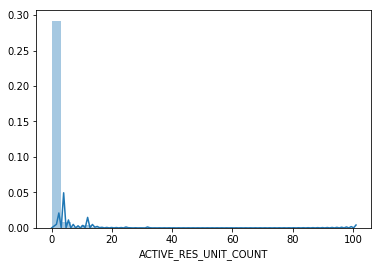

In [50]:
sns.distplot(DC_j.ACTIVE_RES_UNIT_COUNT)

In [61]:
DC_j[['ACTIVE_RES_UNIT_COUNT','ACTIVE_RES_OCCUPANCY_COUNT']].describe()

,ACTIVE_RES_UNIT_COUNT,ACTIVE_RES_OCCUPANCY_COUNT
count,1000.000000,1000.000000
mean,0.567000,1.461000
std,3.869171,3.757206
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,101.000000,101.000000


In [59]:
DC_j.ACTIVE_RES_UNIT_COUNT.describe()[
    'mean']/DC_j.ACTIVE_RES_OCCUPANCY_COUNT.describe()['mean'] 
# this can't be accurate, it would mean 62% of city residences are empty

0.3880903490759753

In [62]:
part = DC_j[DC_j['ACTIVE_RES_OCCUPANCY_COUNT']!=1][['ACTIVE_RES_UNIT_COUNT','ACTIVE_RES_OCCUPANCY_COUNT']]

In [63]:
part.describe()

,ACTIVE_RES_UNIT_COUNT,ACTIVE_RES_OCCUPANCY_COUNT
count,139.000000,139.000000
mean,4.079137,4.316547
std,9.692418,9.625627
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,2.000000
75%,4.000000,4.000000
max,101.000000,101.000000


In [65]:
part[part['ACTIVE_RES_OCCUPANCY_COUNT']>1].describe()

,ACTIVE_RES_UNIT_COUNT,ACTIVE_RES_OCCUPANCY_COUNT
count,99.000000,99.000000
mean,5.727273,6.060606
std,11.079323,10.944963
min,1.000000,2.000000
25%,1.000000,2.000000
50%,3.000000,3.000000
75%,5.000000,5.000000
max,101.000000,101.000000
